In [1]:
!kaggle competitions download -c dogs-vs-cats

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 4, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.12/dist-packages/kaggle/__init__.py", line 6, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.12/dist-packages/kaggle/api/kaggle_api_extended.py", line 434, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.config/kaggle. Or use the environment method. See setup instructions at https://github.com/Kaggle/kaggle-api/


In [2]:
cp kaggle.json /root/.config/kaggle

In [3]:
!kaggle competitions download -c dogs-vs-cats

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download-all/dogs-vs-cats


In [4]:
!chmod 600 /root/.config/kaggle/kaggle.json

In [5]:
!kaggle competitions download -c dogs-vs-cats

401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/competitions/data/download-all/dogs-vs-cats


In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("salader/dogsvscats")

print("Path to dataset files:", path)

100%|██████████| 1.06G/1.06G [00:11<00:00, 103MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1


In [7]:
ls /root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1

catsvsdogs/  test/  train/


In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import pickle

In [9]:
#  Generators

In [10]:
train_ds = keras.utils.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/train",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 20000 files belonging to 2 classes.


In [11]:
validation_ds = keras.utils.image_dataset_from_directory(
    "/root/.cache/kagglehub/datasets/salader/dogsvscats/versions/1/test",
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
)

Found 5000 files belonging to 2 classes.


In [12]:
# data is in numpy 0-255 format, we need to normalize this image

In [13]:
print(train_ds.class_names)

['cats', 'dogs']


In [14]:
train_ds.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Batch shape: (32, 256, 256, 3)
Label shape: (32,)


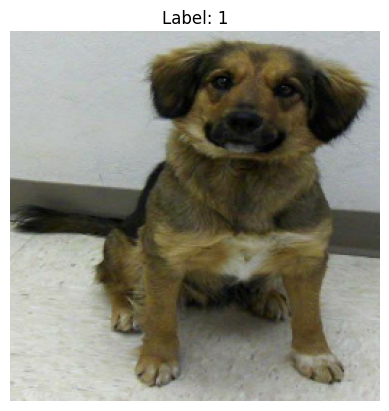

In [15]:
import matplotlib.pyplot as plt

for images, labels in train_ds.take(1):
    print("Batch shape:", images.shape)
    print("Label shape:", labels.shape)

    # Display one sample
    plt.imshow(images[0].numpy().astype("uint8"))
    plt.title(f"Label: {labels[0].numpy()}")
    plt.axis("off")
    plt.show()

In [16]:
def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [56]:
#  create CNN model\

model = Sequential()

model.add(Conv2D(32, (3, 3),padding='valid', activation = 'relu',input_shape=(256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Conv2D(64, (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))


model.add(Conv2D(128, (3, 3),padding='valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))


In [57]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [58]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [59]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 63s 89ms/step - accuracy: 0.5567 - loss: 3.4284 - val_accuracy: 0.6256 - val_loss: 0.6636
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 90ms/step - accuracy: 0.6537 - loss: 0.6258 - val_accuracy: 0.6760 - val_loss: 0.5843
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 87ms/step - accuracy: 0.7254 - loss: 0.5423 - val_accuracy: 0.7652 - val_loss: 0.4998
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 55s 88ms/step - accuracy: 0.7688 - loss: 0.4746 - val_accuracy: 0.7914 - val_loss: 0.4544
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 86ms/step - accuracy: 0.8028 - loss: 0.4242 - val_accuracy: 0.8062 - val_loss: 0.4328
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8407 - loss: 0.3629 - val_accuracy: 0.8134 - val_loss: 0.4507
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 86ms/step - accuracy: 0.8744 - loss: 0.2949 - val_accuracy: 0.7706 - val_loss: 0.6250
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 92ms/step - accuracy: 0.9115 - loss: 0.2127 - 

Text(0, 0.5, 'Accuracy')

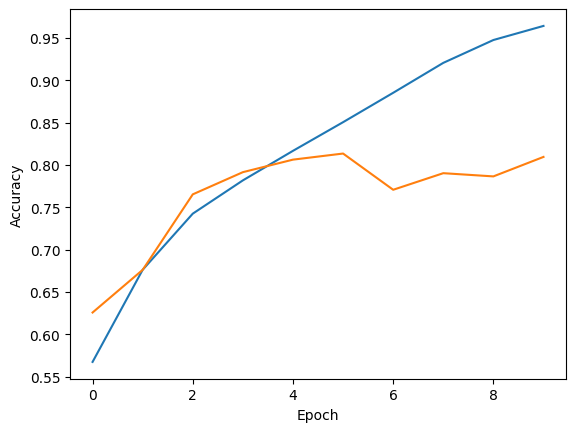

In [60]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

Text(0, 0.5, 'loss')

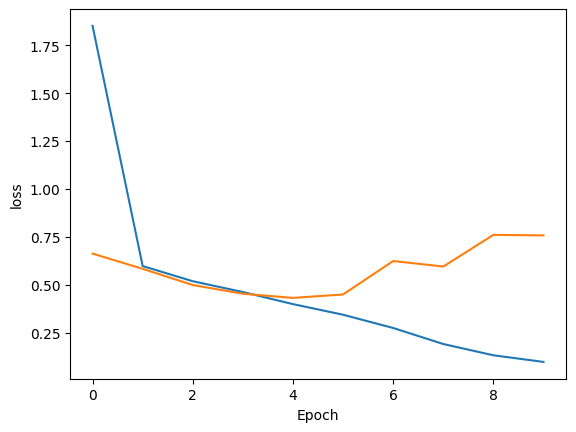

In [61]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')

In [62]:
import cv2

In [75]:
test_image = cv2.imread('dog_image.jpg')

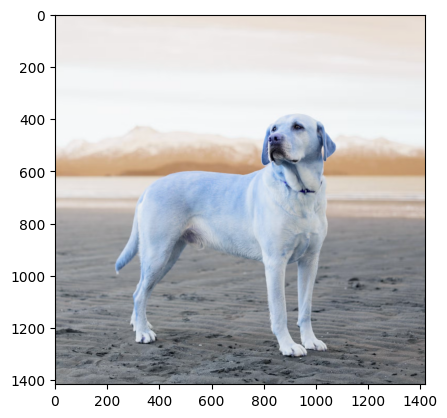

In [76]:
plt.imshow(test_image)

In [77]:
test_image.shape

(1416, 1420, 3)

In [78]:
test_image = cv2.resize(test_image, (256, 256))

In [79]:
test_image.shape

(256, 256, 3)

In [80]:
test_input = test_image.reshape((1, 256, 256, 3))

In [82]:
model.predict(test_input)

# wrongly flagging dog as cat, because i modified architecture

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


array([[0.]], dtype=float32)

In [83]:
test_image_cat = cv2.imread('cat_image.png')

In [84]:
test_image_cat.shape

(400, 600, 3)

In [85]:
test_image_cat = cv2.resize(test_image_cat,(256,256))

In [86]:
test_image_cat.shape

(256, 256, 3)

In [87]:
model.predict(test_image_cat.reshape((1, 256, 256, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step


array([[0.]], dtype=float32)